In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#cities

601

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bc7edf24479d9c2291ee6e8ab46f85e


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | altay
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | esmeraldas
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | milkovo
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | kalmunai
Processing Record 17 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | noumea
Processing Record 21 of Set 1 | sola
Processing Record 22 of Set 1 | melfi
Processing Record 23 of Set 1 |

Processing Record 33 of Set 4 | odesskoye
Processing Record 34 of Set 4 | buraydah
Processing Record 35 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 36 of Set 4 | nemuro
Processing Record 37 of Set 4 | tavda
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | praya
Processing Record 42 of Set 4 | san-pedro
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | barrhead
Processing Record 45 of Set 4 | saint-louis
Processing Record 46 of Set 4 | strezhevoy
Processing Record 47 of Set 4 | inhambane
Processing Record 48 of Set 4 | cabedelo
Processing Record 49 of Set 4 | komsomolskiy
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | ponta delgada
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | cienaga de flores
City not found. Skipping...
Processing Record 4 of Set 5 | westport
Processing Record 5 of Set 5 |

Processing Record 20 of Set 8 | dunmore east
Processing Record 21 of Set 8 | tubruq
City not found. Skipping...
Processing Record 22 of Set 8 | boden
Processing Record 23 of Set 8 | altamira
Processing Record 24 of Set 8 | kijabe
Processing Record 25 of Set 8 | yevsino
Processing Record 26 of Set 8 | islamabad
Processing Record 27 of Set 8 | hambantota
Processing Record 28 of Set 8 | shenzhen
Processing Record 29 of Set 8 | northam
Processing Record 30 of Set 8 | korla
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | luganville
Processing Record 33 of Set 8 | ribeira brava
Processing Record 34 of Set 8 | soloneshnoye
Processing Record 35 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 8 | berlevag
Processing Record 37 of Set 8 | two hills
Processing Record 38 of Set 8 | ginir
Processing Record 39 of Set 8 | pinawa
Processing Record 40 of Set 8 | gorontalo
Processing Record 41 of Set 8 | horsham
Processing Record 42 of Set 8 | kimb

Processing Record 10 of Set 12 | benguela
Processing Record 11 of Set 12 | capellania
Processing Record 12 of Set 12 | wanning
Processing Record 13 of Set 12 | pozo colorado
Processing Record 14 of Set 12 | tacuarembo
Processing Record 15 of Set 12 | excelsior springs
Processing Record 16 of Set 12 | ribeirao branco
Processing Record 17 of Set 12 | nome
Processing Record 18 of Set 12 | ozu
Processing Record 19 of Set 12 | redmond
Processing Record 20 of Set 12 | hobyo
Processing Record 21 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 22 of Set 12 | porto recanati
Processing Record 23 of Set 12 | svetlogorsk
Processing Record 24 of Set 12 | boa vista
Processing Record 25 of Set 12 | itaituba
Processing Record 26 of Set 12 | pombia
Processing Record 27 of Set 12 | artyom
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | chara
Processing Record 30 of Set 12 | robertsport
Processing Record 31 of Set 12 | kozhva
Processing Record 32 of Set

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,24.96,68,75,5.75,CA,2022-04-03 15:45:26
1,Altay,47.8667,88.1167,37.08,59,77,7.20,CN,2022-04-03 15:48:38
2,Hilo,19.7297,-155.0900,71.26,91,100,10.36,US,2022-04-03 15:48:38
3,Rikitea,-23.1203,-134.9692,76.10,64,44,9.04,PF,2022-04-03 15:48:05
4,Esmeraldas,-19.7625,-44.3139,80.71,57,40,7.23,BR,2022-04-03 15:48:38
5,Ostrovnoy,68.0531,39.5131,18.57,87,99,9.46,RU,2022-04-03 15:48:39
6,Chuy,-33.6971,-53.4616,72.30,66,100,11.86,UY,2022-04-03 15:44:47
7,Codrington,-38.2667,141.9667,59.68,80,95,5.37,AU,2022-04-03 15:48:39
8,Milkovo,54.7167,158.6167,10.81,86,9,4.74,RU,2022-04-03 15:48:39
9,Iqaluit,63.7506,-68.5145,26.33,86,75,17.27,CA,2022-04-03 15:48:40


In [10]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-04-03 15:45:26,55.7435,-97.8558,24.96,68,75,5.75
1,Altay,CN,2022-04-03 15:48:38,47.8667,88.1167,37.08,59,77,7.20
2,Hilo,US,2022-04-03 15:48:38,19.7297,-155.0900,71.26,91,100,10.36
3,Rikitea,PF,2022-04-03 15:48:05,-23.1203,-134.9692,76.10,64,44,9.04
4,Esmeraldas,BR,2022-04-03 15:48:38,-19.7625,-44.3139,80.71,57,40,7.23
...,...,...,...,...,...,...,...,...,...
541,Pemangkat,ID,2022-04-03 16:02:17,1.1667,108.9667,78.80,82,53,2.93
542,Fayaoue,NC,2022-04-03 16:02:18,-20.6500,166.5333,81.82,82,100,16.37
543,Sitka,US,2022-04-03 16:02:18,57.0531,-135.3300,37.87,98,100,15.46
544,Erenhot,CN,2022-04-03 16:02:18,43.6475,111.9767,49.19,21,96,15.48


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649002163.9018323

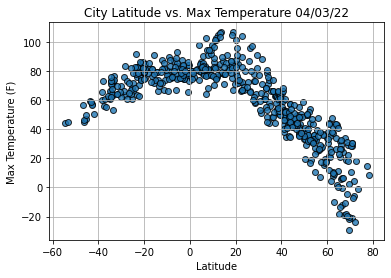

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

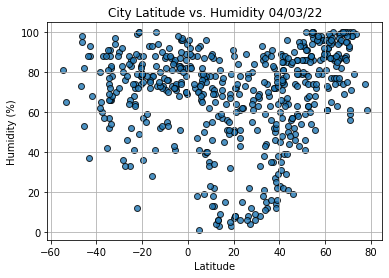

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()